# 语音业务 用户行为分析

## 导入库

In [1]:
import pandas as pd
import seaborn as sns

## 数据预处理

In [2]:
dataOne=pd.read_excel("附件1语音业务用户满意度数据.xlsx",sheet_name='Sheet1')
dataThree=pd.read_excel("附件3语音业务用户满意度预测数据.xlsx",sheet_name='语音')

In [3]:
dataOneColumnsList=list(dataOne.columns)
dataThreeColumnsList=list(dataThree.columns)

In [4]:
dataOneColumnsList

['用户id',
 '语音通话整体满意度',
 '网络覆盖与信号强度',
 '语音通话清晰度',
 '语音通话稳定性',
 '是否遇到过网络问题',
 '居民小区',
 '办公室',
 '高校',
 '商业街',
 '地铁',
 '农村',
 '高铁',
 '其他，请注明',
 '用户描述',
 '手机没有信号',
 '有信号无法拨通',
 '通话过程中突然中断',
 '通话中有杂音、听不清、断断续续',
 '串线',
 '通话过程中一方听不见',
 '其他，请注明.1',
 '用户描述.1',
 '脱网次数',
 'mos质差次数',
 '未接通掉话次数',
 '重定向次数',
 '重定向驻留时长',
 '家宽投诉',
 '资费投诉',
 '4\\5G用户',
 '语音方式',
 '是否关怀用户',
 '是否去过营业厅',
 'ARPU（家庭宽带）',
 '套外流量（MB）',
 '是否4G网络客户（本地剔除物联网）',
 '套外流量费（元）',
 '外省语音占比',
 '语音通话-时长（分钟）',
 '省际漫游-时长（分钟）',
 '终端品牌',
 '终端品牌类型',
 '当月ARPU',
 '当月MOU',
 '前3月ARPU',
 '前3月MOU',
 '外省流量占比',
 'GPRS总流量（KB）',
 'GPRS-国内漫游-流量（KB）',
 '是否5G网络客户',
 '是否实名登记用户',
 '客户星级标识',
 '当月欠费金额',
 '前第3个月欠费金额']

In [5]:
dataThreeColumnsList

['用户id',
 '是否遇到过网络问题',
 '居民小区',
 '办公室',
 '高校',
 '商业街',
 '地铁',
 '农村',
 '高铁',
 '其他，请注明',
 '用户描述',
 '手机没有信号',
 '有信号无法拨通',
 '通话过程中突然中断',
 '通话中有杂音、听不清、断断续续',
 '串线',
 '通话过程中一方听不见',
 '其他，请注明.1',
 '用户描述.1',
 '脱网次数',
 'mos质差次数',
 '未接通掉话次数',
 '是否投诉',
 '性别',
 '4\\5G用户',
 '是否关怀用户',
 '套外流量（MB）',
 '是否4G网络客户（本地剔除物联网）',
 '套外流量费（元）',
 '外省语音占比',
 '语音通话-时长（分钟）',
 '省际漫游-时长（分钟）',
 '终端品牌',
 '终端品牌类型',
 '当月ARPU',
 '当月MOU',
 '前3月ARPU',
 '前3月MOU',
 '外省流量占比',
 'GPRS总流量（KB）',
 'GPRS-国内漫游-流量（KB）',
 '是否5G网络客户',
 '客户星级标识',
 '是否不限量套餐到达用户']

In [6]:
set(dataOneColumnsList)&set(dataThreeColumnsList)

{'4\\5G用户',
 'GPRS-国内漫游-流量（KB）',
 'GPRS总流量（KB）',
 'mos质差次数',
 '串线',
 '其他，请注明',
 '其他，请注明.1',
 '农村',
 '前3月ARPU',
 '前3月MOU',
 '办公室',
 '商业街',
 '地铁',
 '外省流量占比',
 '外省语音占比',
 '套外流量费（元）',
 '套外流量（MB）',
 '客户星级标识',
 '居民小区',
 '当月ARPU',
 '当月MOU',
 '手机没有信号',
 '是否4G网络客户（本地剔除物联网）',
 '是否5G网络客户',
 '是否关怀用户',
 '是否遇到过网络问题',
 '有信号无法拨通',
 '未接通掉话次数',
 '用户id',
 '用户描述',
 '用户描述.1',
 '省际漫游-时长（分钟）',
 '终端品牌',
 '终端品牌类型',
 '脱网次数',
 '语音通话-时长（分钟）',
 '通话中有杂音、听不清、断断续续',
 '通话过程中一方听不见',
 '通话过程中突然中断',
 '高校',
 '高铁'}

In [7]:
dataOne['资费投诉']=dataOne.loc[:, ['家宽投诉','资费投诉']].apply(lambda x1:x1.sum(), axis=1)
dataOne.drop(['家宽投诉'], axis=1, inplace=True)
dataOne.rename(columns={'资费投诉':'是否投诉'}, inplace=True)
dataOne

,用户id,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,...,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,是否实名登记用户,客户星级标识,当月欠费金额,前第3个月欠费金额
0,1,10,6,6,6,1,-1,2,-1,-1,...,0.0,480,1.0,8450801,8450801,是,否,银卡,0.0,0.00
1,2,2,1,1,1,1,1,2,-1,4,...,0.0,480,1.0,17425910,17425910,是,是,银卡,0.0,0.00
2,3,10,7,7,7,1,-1,-1,-1,-1,...,0.0,413,1.0,6215849,6215849,否,否,三星,0.0,3.76
3,4,6,7,7,6,1,1,2,-1,-1,...,0.0,301,1.0,5370710,5370710,是,否,三星,0.0,0.00
4,5,5,5,4,3,1,-1,2,-1,-1,...,0.0,1193,1.0,3857521,3857521,否,否,银卡,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5428,5429,10,10,10,8,1,-1,2,-1,-1,...,0.0,320,0.0,16654303,0,否,否,二星,0.0,0.00
5429,5430,10,10,10,10,1,1,2,-1,-1,...,0.0,147,0.0,627901,0,是,否,三星,0.0,0.00
5430,5431,6,5,7,4,1,-1,-1,-1,4,...,0.0,150,0.0,6816663,0,否,否,银卡,0.0,0.00
5431,5432,9,9,10,9,1,-1,-1,-1,-1,...,0.0,82,0.0,1841891,0,否,否,三星,0.0,0.00


In [8]:
dataOneColumnsList=list(dataOne.columns)
dataOneColumnsList

['用户id',
 '语音通话整体满意度',
 '网络覆盖与信号强度',
 '语音通话清晰度',
 '语音通话稳定性',
 '是否遇到过网络问题',
 '居民小区',
 '办公室',
 '高校',
 '商业街',
 '地铁',
 '农村',
 '高铁',
 '其他，请注明',
 '用户描述',
 '手机没有信号',
 '有信号无法拨通',
 '通话过程中突然中断',
 '通话中有杂音、听不清、断断续续',
 '串线',
 '通话过程中一方听不见',
 '其他，请注明.1',
 '用户描述.1',
 '脱网次数',
 'mos质差次数',
 '未接通掉话次数',
 '重定向次数',
 '重定向驻留时长',
 '是否投诉',
 '4\\5G用户',
 '语音方式',
 '是否关怀用户',
 '是否去过营业厅',
 'ARPU（家庭宽带）',
 '套外流量（MB）',
 '是否4G网络客户（本地剔除物联网）',
 '套外流量费（元）',
 '外省语音占比',
 '语音通话-时长（分钟）',
 '省际漫游-时长（分钟）',
 '终端品牌',
 '终端品牌类型',
 '当月ARPU',
 '当月MOU',
 '前3月ARPU',
 '前3月MOU',
 '外省流量占比',
 'GPRS总流量（KB）',
 'GPRS-国内漫游-流量（KB）',
 '是否5G网络客户',
 '是否实名登记用户',
 '客户星级标识',
 '当月欠费金额',
 '前第3个月欠费金额']

In [9]:
dataThreeColumnsList=list(dataThree.columns)
dataThreeColumnsList

['用户id',
 '是否遇到过网络问题',
 '居民小区',
 '办公室',
 '高校',
 '商业街',
 '地铁',
 '农村',
 '高铁',
 '其他，请注明',
 '用户描述',
 '手机没有信号',
 '有信号无法拨通',
 '通话过程中突然中断',
 '通话中有杂音、听不清、断断续续',
 '串线',
 '通话过程中一方听不见',
 '其他，请注明.1',
 '用户描述.1',
 '脱网次数',
 'mos质差次数',
 '未接通掉话次数',
 '是否投诉',
 '性别',
 '4\\5G用户',
 '是否关怀用户',
 '套外流量（MB）',
 '是否4G网络客户（本地剔除物联网）',
 '套外流量费（元）',
 '外省语音占比',
 '语音通话-时长（分钟）',
 '省际漫游-时长（分钟）',
 '终端品牌',
 '终端品牌类型',
 '当月ARPU',
 '当月MOU',
 '前3月ARPU',
 '前3月MOU',
 '外省流量占比',
 'GPRS总流量（KB）',
 'GPRS-国内漫游-流量（KB）',
 '是否5G网络客户',
 '客户星级标识',
 '是否不限量套餐到达用户']

In [10]:
set(dataOneColumnsList)-set(dataThreeColumnsList)

{'ARPU（家庭宽带）',
 '前第3个月欠费金额',
 '当月欠费金额',
 '是否去过营业厅',
 '是否实名登记用户',
 '网络覆盖与信号强度',
 '语音方式',
 '语音通话整体满意度',
 '语音通话清晰度',
 '语音通话稳定性',
 '重定向次数',
 '重定向驻留时长'}

In [11]:
dataOne.drop(['用户id',
              '用户描述',
              '用户描述.1',
              '重定向次数',
              '重定向驻留时长',
              '语音方式',
              '是否去过营业厅',
              'ARPU（家庭宽带）',
              '是否实名登记用户',
              '当月欠费金额',
              '前第3个月欠费金额',
              '终端品牌类型'], axis=1, inplace=True)
dataOne

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识
0,10,6,6,6,1,-1,2,-1,-1,-1,...,苹果,347.32,644,0.0,480,1.0,8450801,8450801,是,银卡
1,2,1,1,1,1,1,2,-1,4,-1,...,华为,111.40,902,0.0,480,1.0,17425910,17425910,是,银卡
2,10,7,7,7,1,-1,-1,-1,-1,-1,...,华为,48.00,322,0.0,413,1.0,6215849,6215849,否,三星
3,6,7,7,6,1,1,2,-1,-1,-1,...,苹果,49.00,139,0.0,301,1.0,5370710,5370710,是,三星
4,5,5,4,3,1,-1,2,-1,-1,5,...,苹果,138.10,787,0.0,1193,1.0,3857521,3857521,否,银卡
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5428,10,10,10,8,1,-1,2,-1,-1,-1,...,苹果,57.00,293,0.0,320,0.0,16654303,0,否,二星
5429,10,10,10,10,1,1,2,-1,-1,-1,...,苹果,179.89,1277,0.0,147,0.0,627901,0,是,三星
5430,6,5,7,4,1,-1,-1,-1,4,-1,...,华为,90.00,115,0.0,150,0.0,6816663,0,否,银卡
5431,9,9,10,9,1,-1,-1,-1,-1,5,...,小米科技,19.00,179,0.0,82,0.0,1841891,0,否,三星


In [12]:
dataOne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5433 entries, 0 to 5432
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   语音通话整体满意度          5433 non-null   int64  
 1   网络覆盖与信号强度          5433 non-null   int64  
 2   语音通话清晰度            5433 non-null   int64  
 3   语音通话稳定性            5433 non-null   int64  
 4   是否遇到过网络问题          5433 non-null   int64  
 5   居民小区               5433 non-null   int64  
 6   办公室                5433 non-null   int64  
 7   高校                 5433 non-null   int64  
 8   商业街                5433 non-null   int64  
 9   地铁                 5433 non-null   int64  
 10  农村                 5433 non-null   int64  
 11  高铁                 5433 non-null   int64  
 12  其他，请注明             5433 non-null   int64  
 13  手机没有信号             5433 non-null   int64  
 14  有信号无法拨通            5433 non-null   int64  
 15  通话过程中突然中断          5433 non-null   int64  
 16  通话中有杂音、听不清、断断续续    5433 

In [13]:
dataOne.isnull().sum()

语音通话整体满意度               0
网络覆盖与信号强度               0
语音通话清晰度                 0
语音通话稳定性                 0
是否遇到过网络问题               0
居民小区                    0
办公室                     0
高校                      0
商业街                     0
地铁                      0
农村                      0
高铁                      0
其他，请注明                  0
手机没有信号                  0
有信号无法拨通                 0
通话过程中突然中断               0
通话中有杂音、听不清、断断续续         0
串线                      0
通话过程中一方听不见              0
其他，请注明.1                0
脱网次数                    0
mos质差次数                 0
未接通掉话次数                 0
是否投诉                    0
4\5G用户                  0
是否关怀用户               5233
套外流量（MB）                0
是否4G网络客户（本地剔除物联网）       5
套外流量费（元）                0
外省语音占比                  0
语音通话-时长（分钟）             0
省际漫游-时长（分钟）             0
终端品牌                    4
当月ARPU                  0
当月MOU                   0
前3月ARPU                 0
前3月MOU                  0
外省流量占比                  2
GPRS总流量（KB） 

In [14]:
dataOne['外省流量占比']=dataOne['外省流量占比'].fillna(0)
dataOne["是否关怀用户"]=dataOne["是否关怀用户"].fillna(0)
dataOne["外省流量占比"]=dataOne["外省流量占比"].astype(str).replace('%','')
dataOne["外省语音占比"]=dataOne["外省语音占比"].astype(str).replace('%','')
dataOne

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识
0,10,6,6,6,1,-1,2,-1,-1,-1,...,苹果,347.32,644,0.0,480,1.0,8450801,8450801,是,银卡
1,2,1,1,1,1,1,2,-1,4,-1,...,华为,111.40,902,0.0,480,1.0,17425910,17425910,是,银卡
2,10,7,7,7,1,-1,-1,-1,-1,-1,...,华为,48.00,322,0.0,413,1.0,6215849,6215849,否,三星
3,6,7,7,6,1,1,2,-1,-1,-1,...,苹果,49.00,139,0.0,301,1.0,5370710,5370710,是,三星
4,5,5,4,3,1,-1,2,-1,-1,5,...,苹果,138.10,787,0.0,1193,1.0,3857521,3857521,否,银卡
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5428,10,10,10,8,1,-1,2,-1,-1,-1,...,苹果,57.00,293,0.0,320,0.0,16654303,0,否,二星
5429,10,10,10,10,1,1,2,-1,-1,-1,...,苹果,179.89,1277,0.0,147,0.0,627901,0,是,三星
5430,6,5,7,4,1,-1,-1,-1,4,-1,...,华为,90.00,115,0.0,150,0.0,6816663,0,否,银卡
5431,9,9,10,9,1,-1,-1,-1,-1,5,...,小米科技,19.00,179,0.0,82,0.0,1841891,0,否,三星


In [15]:
dataOne.replace({"是否遇到过网络问题":{2:0},
                 "居民小区":{-1:0},
                 "办公室":{-1:0,2:1},
                 "高校":{-1:0,3:1},
                 "商业街":{-1:0,4:1},
                 "地铁":{-1:0,5:1},
                 "农村":{-1:0,6:1},
                 "高铁":{-1:0,7:1},
                 "其他，请注明":{-1:0,98:1},
                 "手机没有信号":{-1:0},
                 "有信号无法拨通":{-1:0,2:1},
                 "通话过程中突然中断":{-1:0,3:1},
                 "通话中有杂音、听不清、断断续续":{-1:0,4:1},
                 "串线":{-1:0,5:1},
                 "通话过程中一方听不见":{-1:0,6:1},
                 "其他，请注明.1":{-1:0,98:1},
                 "是否关怀用户":{'是':1},
                 "是否4G网络客户（本地剔除物联网）":{'是':1,"否":0},
                 "是否5G网络客户":{'是':1,"否":0},
                 "客户星级标识":{'未评级':0,'准星':1,'一星':2,'二星':3,'三星':4,'银卡':5,'金卡':6,'白金卡':7,'钻石卡':8}
                 }, inplace=True)
dataOne

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识
0,10,6,6,6,1,0,1,0,0,0,...,苹果,347.32,644,0.0,480,1.0,8450801,8450801,1.0,5.0
1,2,1,1,1,1,1,1,0,1,0,...,华为,111.40,902,0.0,480,1.0,17425910,17425910,1.0,5.0
2,10,7,7,7,1,0,0,0,0,0,...,华为,48.00,322,0.0,413,1.0,6215849,6215849,0.0,4.0
3,6,7,7,6,1,1,1,0,0,0,...,苹果,49.00,139,0.0,301,1.0,5370710,5370710,1.0,4.0
4,5,5,4,3,1,0,1,0,0,1,...,苹果,138.10,787,0.0,1193,1.0,3857521,3857521,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5428,10,10,10,8,1,0,1,0,0,0,...,苹果,57.00,293,0.0,320,0.0,16654303,0,0.0,3.0
5429,10,10,10,10,1,1,1,0,0,0,...,苹果,179.89,1277,0.0,147,0.0,627901,0,1.0,4.0
5430,6,5,7,4,1,0,0,0,1,0,...,华为,90.00,115,0.0,150,0.0,6816663,0,0.0,5.0
5431,9,9,10,9,1,0,0,0,0,1,...,小米科技,19.00,179,0.0,82,0.0,1841891,0,0.0,4.0


In [16]:
dataOne.isnull().sum()

语音通话整体满意度            0
网络覆盖与信号强度            0
语音通话清晰度              0
语音通话稳定性              0
是否遇到过网络问题            0
居民小区                 0
办公室                  0
高校                   0
商业街                  0
地铁                   0
农村                   0
高铁                   0
其他，请注明               0
手机没有信号               0
有信号无法拨通              0
通话过程中突然中断            0
通话中有杂音、听不清、断断续续      0
串线                   0
通话过程中一方听不见           0
其他，请注明.1             0
脱网次数                 0
mos质差次数              0
未接通掉话次数              0
是否投诉                 0
4\5G用户               0
是否关怀用户               0
套外流量（MB）             0
是否4G网络客户（本地剔除物联网）    5
套外流量费（元）             0
外省语音占比               0
语音通话-时长（分钟）          0
省际漫游-时长（分钟）          0
终端品牌                 4
当月ARPU               0
当月MOU                0
前3月ARPU              0
前3月MOU               0
外省流量占比               0
GPRS总流量（KB）          0
GPRS-国内漫游-流量（KB）     0
是否5G网络客户             5
客户星级标识               5
dtype: int64

In [17]:
dataOneMiss=dataOne.isnull()
dataOne[dataOneMiss.any(axis=1)==True]

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识
1572,10,10,10,10,0,0,0,0,0,0,...,NaN,0.0,0,0.0,0,0.0,0,0,NaN,NaN
1600,7,7,8,7,1,0,1,0,0,0,...,NaN,0.0,0,0.0,0,0.0,0,0,NaN,NaN
2326,10,10,10,10,0,0,0,0,0,0,...,NaN,0.0,0,0.0,0,0.0,0,0,NaN,NaN
2827,9,9,9,9,0,0,0,0,0,0,...,NaN,0.0,0,0.0,0,0.0,0,0,NaN,NaN
3265,4,3,2,4,1,1,0,1,1,0,...,其他,0.0,0,0.0,0,0.0,0,0,NaN,NaN


In [18]:
dataOne.dropna(inplace=True)
dataOne=dataOne.reset_index(drop=True)
dataOne

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识
0,10,6,6,6,1,0,1,0,0,0,...,苹果,347.32,644,0.0,480,1.0,8450801,8450801,1.0,5.0
1,2,1,1,1,1,1,1,0,1,0,...,华为,111.40,902,0.0,480,1.0,17425910,17425910,1.0,5.0
2,10,7,7,7,1,0,0,0,0,0,...,华为,48.00,322,0.0,413,1.0,6215849,6215849,0.0,4.0
3,6,7,7,6,1,1,1,0,0,0,...,苹果,49.00,139,0.0,301,1.0,5370710,5370710,1.0,4.0
4,5,5,4,3,1,0,1,0,0,1,...,苹果,138.10,787,0.0,1193,1.0,3857521,3857521,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5423,10,10,10,8,1,0,1,0,0,0,...,苹果,57.00,293,0.0,320,0.0,16654303,0,0.0,3.0
5424,10,10,10,10,1,1,1,0,0,0,...,苹果,179.89,1277,0.0,147,0.0,627901,0,1.0,4.0
5425,6,5,7,4,1,0,0,0,1,0,...,华为,90.00,115,0.0,150,0.0,6816663,0,0.0,5.0
5426,9,9,10,9,1,0,0,0,0,1,...,小米科技,19.00,179,0.0,82,0.0,1841891,0,0.0,4.0


In [19]:
dataOne.dtypes

语音通话整体满意度              int64
网络覆盖与信号强度              int64
语音通话清晰度                int64
语音通话稳定性                int64
是否遇到过网络问题              int64
居民小区                   int64
办公室                    int64
高校                     int64
商业街                    int64
地铁                     int64
农村                     int64
高铁                     int64
其他，请注明                 int64
手机没有信号                 int64
有信号无法拨通                int64
通话过程中突然中断              int64
通话中有杂音、听不清、断断续续        int64
串线                     int64
通话过程中一方听不见             int64
其他，请注明.1               int64
脱网次数                   int64
mos质差次数                int64
未接通掉话次数                int64
是否投诉                   int64
4\5G用户                object
是否关怀用户                 int64
套外流量（MB）             float64
是否4G网络客户（本地剔除物联网）    float64
套外流量费（元）             float64
外省语音占比                object
语音通话-时长（分钟）            int64
省际漫游-时长（分钟）            int64
终端品牌                  object
当月ARPU               float64
当月MOU         

In [20]:
dataOne['外省语音占比'] = dataOne['外省语音占比'].astype('float64')
dataOne['外省流量占比'] = dataOne['外省流量占比'].astype('float64')
dataOne['是否4G网络客户（本地剔除物联网）'] = dataOne['是否4G网络客户（本地剔除物联网）'].astype('int64')
dataOne['4\\5G用户'] = dataOne['4\\5G用户'].astype(str)
dataOne['终端品牌'] = dataOne['终端品牌'].astype(str)
dataOne

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识
0,10,6,6,6,1,0,1,0,0,0,...,苹果,347.32,644,0.0,480,1.0,8450801,8450801,1.0,5.0
1,2,1,1,1,1,1,1,0,1,0,...,华为,111.40,902,0.0,480,1.0,17425910,17425910,1.0,5.0
2,10,7,7,7,1,0,0,0,0,0,...,华为,48.00,322,0.0,413,1.0,6215849,6215849,0.0,4.0
3,6,7,7,6,1,1,1,0,0,0,...,苹果,49.00,139,0.0,301,1.0,5370710,5370710,1.0,4.0
4,5,5,4,3,1,0,1,0,0,1,...,苹果,138.10,787,0.0,1193,1.0,3857521,3857521,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5423,10,10,10,8,1,0,1,0,0,0,...,苹果,57.00,293,0.0,320,0.0,16654303,0,0.0,3.0
5424,10,10,10,10,1,1,1,0,0,0,...,苹果,179.89,1277,0.0,147,0.0,627901,0,1.0,4.0
5425,6,5,7,4,1,0,0,0,1,0,...,华为,90.00,115,0.0,150,0.0,6816663,0,0.0,5.0
5426,9,9,10,9,1,0,0,0,0,1,...,小米科技,19.00,179,0.0,82,0.0,1841891,0,0.0,4.0


In [21]:
import sklearn.preprocessing as sp
le=sp.LabelEncoder()

OverallSatisfactionVoiceCalls=le.fit_transform(dataOne["语音通话整体满意度"])
NetworkCoverageSignalStrength=le.fit_transform(dataOne["网络覆盖与信号强度"])
VoiceCallDefinition=le.fit_transform(dataOne["语音通话清晰度"])
VoiceCallStability=le.fit_transform(dataOne["语音通话稳定性"])

FourFiveUser=le.fit_transform(dataOne["4\\5G用户"])
TerminalBrand=le.fit_transform(dataOne["终端品牌"])

dataOne["语音通话整体满意度"]=pd.DataFrame(OverallSatisfactionVoiceCalls)
dataOne["网络覆盖与信号强度"]=pd.DataFrame(NetworkCoverageSignalStrength)
dataOne["语音通话清晰度"]=pd.DataFrame(VoiceCallDefinition)
dataOne["语音通话稳定性"]=pd.DataFrame(VoiceCallStability)

dataOne["4\\5G用户"]=pd.DataFrame(FourFiveUser)
dataOne["终端品牌"]=pd.DataFrame(TerminalBrand)
dataOne

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识
0,9,5,5,5,1,0,1,0,0,0,...,22,347.32,644,0.0,480,1.0,8450801,8450801,1.0,5.0
1,1,0,0,0,1,1,1,0,1,0,...,11,111.40,902,0.0,480,1.0,17425910,17425910,1.0,5.0
2,9,6,6,6,1,0,0,0,0,0,...,11,48.00,322,0.0,413,1.0,6215849,6215849,0.0,4.0
3,5,6,6,5,1,1,1,0,0,0,...,22,49.00,139,0.0,301,1.0,5370710,5370710,1.0,4.0
4,4,4,3,2,1,0,1,0,0,1,...,22,138.10,787,0.0,1193,1.0,3857521,3857521,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5423,9,9,9,7,1,0,1,0,0,0,...,22,57.00,293,0.0,320,0.0,16654303,0,0.0,3.0
5424,9,9,9,9,1,1,1,0,0,0,...,22,179.89,1277,0.0,147,0.0,627901,0,1.0,4.0
5425,5,4,6,3,1,0,0,0,1,0,...,11,90.00,115,0.0,150,0.0,6816663,0,0.0,5.0
5426,8,8,9,8,1,0,0,0,0,1,...,14,19.00,179,0.0,82,0.0,1841891,0,0.0,4.0


In [22]:
def complain(x):
    if x!=0:
        return 1
    else:
        return 0


for i in range(len(dataOne)):
    dataOne.loc[i, '是否投诉']=complain(dataOne.loc[i, '是否投诉'])

dataOne

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识
0,9,5,5,5,1,0,1,0,0,0,...,22,347.32,644,0.0,480,1.0,8450801,8450801,1.0,5.0
1,1,0,0,0,1,1,1,0,1,0,...,11,111.40,902,0.0,480,1.0,17425910,17425910,1.0,5.0
2,9,6,6,6,1,0,0,0,0,0,...,11,48.00,322,0.0,413,1.0,6215849,6215849,0.0,4.0
3,5,6,6,5,1,1,1,0,0,0,...,22,49.00,139,0.0,301,1.0,5370710,5370710,1.0,4.0
4,4,4,3,2,1,0,1,0,0,1,...,22,138.10,787,0.0,1193,1.0,3857521,3857521,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5423,9,9,9,7,1,0,1,0,0,0,...,22,57.00,293,0.0,320,0.0,16654303,0,0.0,3.0
5424,9,9,9,9,1,1,1,0,0,0,...,22,179.89,1277,0.0,147,0.0,627901,0,1.0,4.0
5425,5,4,6,3,1,0,0,0,1,0,...,11,90.00,115,0.0,150,0.0,6816663,0,0.0,5.0
5426,8,8,9,8,1,0,0,0,0,1,...,14,19.00,179,0.0,82,0.0,1841891,0,0.0,4.0


In [23]:
dataOne['是否5G网络客户'] = dataOne['是否5G网络客户'].astype('int64')
dataOne['客户星级标识'] = dataOne['客户星级标识'].astype('int64')
dataOne

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识
0,9,5,5,5,1,0,1,0,0,0,...,22,347.32,644,0.0,480,1.0,8450801,8450801,1,5
1,1,0,0,0,1,1,1,0,1,0,...,11,111.40,902,0.0,480,1.0,17425910,17425910,1,5
2,9,6,6,6,1,0,0,0,0,0,...,11,48.00,322,0.0,413,1.0,6215849,6215849,0,4
3,5,6,6,5,1,1,1,0,0,0,...,22,49.00,139,0.0,301,1.0,5370710,5370710,1,4
4,4,4,3,2,1,0,1,0,0,1,...,22,138.10,787,0.0,1193,1.0,3857521,3857521,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5423,9,9,9,7,1,0,1,0,0,0,...,22,57.00,293,0.0,320,0.0,16654303,0,0,3
5424,9,9,9,9,1,1,1,0,0,0,...,22,179.89,1277,0.0,147,0.0,627901,0,1,4
5425,5,4,6,3,1,0,0,0,1,0,...,11,90.00,115,0.0,150,0.0,6816663,0,0,5
5426,8,8,9,8,1,0,0,0,0,1,...,14,19.00,179,0.0,82,0.0,1841891,0,0,4


In [24]:
dataOne.describe()

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识
count,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000,...,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000,5.428000e+03,5.428000e+03,5428.000000,5428.000000
mean,7.680545,7.340088,7.633751,7.428703,0.526529,0.339352,0.204864,0.021371,0.080877,0.223102,...,16.157885,85.144040,463.557111,0.618769,463.522476,0.054622,1.806673e+07,9.740573e+05,0.383935,4.145173
std,2.261268,2.419601,2.203064,2.374136,0.499342,0.473533,0.403639,0.144630,0.272671,0.416365,...,5.294143,68.474887,657.454919,6.288590,632.885365,0.212554,3.243160e+07,6.038611e+06,0.486387,0.947255
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,7.000000,7.000000,7.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.000000,39.260000,170.000000,0.000000,182.000000,0.000000,4.622197e+06,0.000000e+00,0.000000,4.000000
50%,9.000000,8.000000,9.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,14.000000,68.000000,298.000000,0.000000,307.500000,0.000000,1.200827e+07,0.000000e+00,0.000000,4.000000
75%,9.000000,9.000000,9.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,22.000000,115.000000,561.250000,0.000000,546.250000,0.000000,2.395730e+07,0.000000e+00,1.000000,5.000000
max,9.000000,9.000000,9.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,26.000000,892.720000,29493.000000,199.000000,31066.000000,1.000000,1.892487e+09,1.745414e+08,1.000000,8.000000


## 用户行为分析

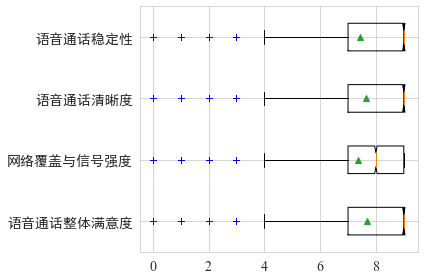

In [25]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

box_data = dataOne[['语音通话整体满意度',
                    '网络覆盖与信号强度',
                    '语音通话清晰度',
                    '语音通话稳定性',]]
plt.grid(True)
plt.boxplot(box_data,
            notch = True,
            sym = "b+",
            vert = False,
            showmeans = True,
            labels = ['语音通话整体满意度',
                      '网络覆盖与信号强度',
                      '语音通话清晰度',
                      '语音通话稳定性',])
plt.yticks(size=14)
plt.xticks(size=14, font='Times New Roman')
plt.tight_layout()
plt.savefig('figuresOne\\[附件1][语音通话整体满意度、网络覆盖与信号强度、语音通话清晰度、语音通话稳定性]评分箱线图.pdf')

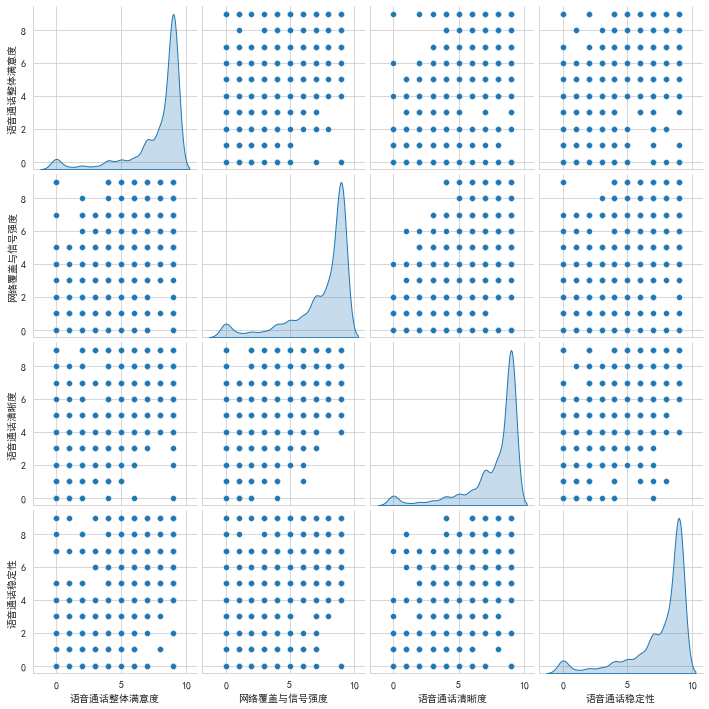

In [26]:
sns.pairplot(dataOne[['语音通话整体满意度','网络覆盖与信号强度','语音通话清晰度','语音通话稳定性']],kind='scatter',diag_kind='kde')
plt.savefig('figuresOne\\[附件1][语音通话整体满意度、网络覆盖与信号强度、语音通话清晰度、语音通话稳定性]评分联合分布图.pdf',bbox_inches='tight')

## 划分高分组和低分组

In [27]:
dataOne['场所合计']=dataOne.loc[:,['居民小区','办公室', '高校', '商业街', '地铁', '农村', '高铁', '其他，请注明']].apply(lambda x1:x1.sum(),axis=1)
dataOne['出现问题合计']=dataOne.loc[:,['手机没有信号','有信号无法拨通','通话过程中突然中断','通话中有杂音、听不清、断断续续','串线','通话过程中一方听不见','其他，请注明.1']].apply(lambda x1:x1.sum(),axis=1)
dataOne['脱网次数、mos质差次数、未接通掉话次数合计']=dataOne.loc[:,['脱网次数','mos质差次数','未接通掉话次数']].apply(lambda x1:x1.sum(),axis=1)
dataOne['整体评分']=dataOne.loc[:,['语音通话整体满意度','网络覆盖与信号强度','语音通话清晰度','语音通话稳定性']].apply(lambda x1:round(x1.mean()),axis=1)
dataOne

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识,场所合计,出现问题合计,脱网次数、mos质差次数、未接通掉话次数合计,整体评分
0,9,5,5,5,1,0,1,0,0,0,...,480,1.0,8450801,8450801,1,5,1,2,0,6
1,1,0,0,0,1,1,1,0,1,0,...,480,1.0,17425910,17425910,1,5,3,2,0,0
2,9,6,6,6,1,0,0,0,0,0,...,413,1.0,6215849,6215849,0,4,1,2,0,7
3,5,6,6,5,1,1,1,0,0,0,...,301,1.0,5370710,5370710,1,4,2,2,0,6
4,4,4,3,2,1,0,1,0,0,1,...,1193,1.0,3857521,3857521,0,5,3,4,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5423,9,9,9,7,1,0,1,0,0,0,...,320,0.0,16654303,0,0,3,1,2,5,8
5424,9,9,9,9,1,1,1,0,0,0,...,147,0.0,627901,0,1,4,3,2,15,9
5425,5,4,6,3,1,0,0,0,1,0,...,150,0.0,6816663,0,0,5,2,2,0,4
5426,8,8,9,8,1,0,0,0,0,1,...,82,0.0,1841891,0,0,4,2,2,8,8


In [28]:
dataOneHigh = dataOne[(dataOne['语音通话整体满意度']>=7)&(dataOne['网络覆盖与信号强度']>=7)&(dataOne['语音通话清晰度']>=7)&(dataOne['语音通话稳定性']>=7)]
dataOneLow = dataOne[(dataOne['语音通话整体满意度']<=4)&(dataOne['网络覆盖与信号强度']<=4)&(dataOne['语音通话清晰度']<=4)&(dataOne['语音通话稳定性']<=4)]

In [29]:
dataOneHigh.describe()

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识,场所合计,出现问题合计,脱网次数、mos质差次数、未接通掉话次数合计,整体评分
count,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,...,3913.000000,3913.000000,3.913000e+03,3.913000e+03,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000
mean,8.705341,8.556095,8.650652,8.582162,0.387938,0.224636,0.120624,0.007411,0.043700,0.160235,...,438.892665,0.050725,1.748099e+07,9.527503e+05,0.382315,4.141324,0.744442,0.825709,12.353948,8.617174
std,0.585977,0.706734,0.632585,0.694676,0.487343,0.417396,0.325731,0.085780,0.204454,0.366871,...,664.674403,0.204906,1.966913e+07,5.983154e+06,0.486015,0.854862,1.150536,1.263691,35.683821,0.599191
min,7.000000,7.000000,7.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
25%,9.000000,8.000000,8.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,176.000000,0.000000,4.482005e+06,0.000000e+00,0.000000,4.000000,0.000000,0.000000,0.000000,8.000000
50%,9.000000,9.000000,9.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,292.000000,0.000000,1.165004e+07,0.000000e+00,0.000000,4.000000,0.000000,0.000000,4.000000,9.000000
75%,9.000000,9.000000,9.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,513.000000,0.000000,2.328895e+07,0.000000e+00,1.000000,5.000000,1.000000,1.000000,12.000000,9.000000
max,9.000000,9.000000,9.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,31066.000000,1.000000,2.262635e+08,1.275470e+08,1.000000,8.000000,8.000000,7.000000,1284.000000,9.000000


In [30]:
dataOneLow.describe()

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识,场所合计,出现问题合计,脱网次数、mos质差次数、未接通掉话次数合计,整体评分
count,413.000000,413.000000,413.000000,413.000000,413.00000,413.000000,413.000000,413.000000,413.000000,413.000000,...,413.000000,413.000000,4.130000e+02,4.130000e+02,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,1.569007,1.368039,1.641646,1.353511,0.94431,0.743341,0.537530,0.082324,0.237288,0.334140,...,565.336562,0.080535,2.016282e+07,1.653863e+06,0.382567,4.145278,2.469734,3.191283,17.920097,1.474576
std,1.681772,1.556429,1.667045,1.569110,0.22960,0.437319,0.499194,0.275192,0.425936,0.472261,...,555.616050,0.259072,2.904040e+07,1.024654e+07,0.486603,1.323136,1.825435,1.695145,33.916243,1.541484
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,204.000000,0.000000,3.856499e+06,0.000000e+00,0.000000,4.000000,1.000000,2.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,...,399.000000,0.000000,1.248876e+07,0.000000e+00,0.000000,4.000000,2.000000,3.000000,8.000000,1.000000
75%,3.000000,3.000000,3.000000,3.000000,1.00000,1.000000,1.000000,0.000000,0.000000,1.000000,...,701.000000,0.000000,2.554928e+07,0.000000e+00,1.000000,5.000000,3.000000,4.000000,21.000000,3.000000
max,4.000000,4.000000,4.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3839.000000,1.000000,4.183957e+08,1.745414e+08,1.000000,8.000000,8.000000,7.000000,350.000000,4.000000


## 特征分析

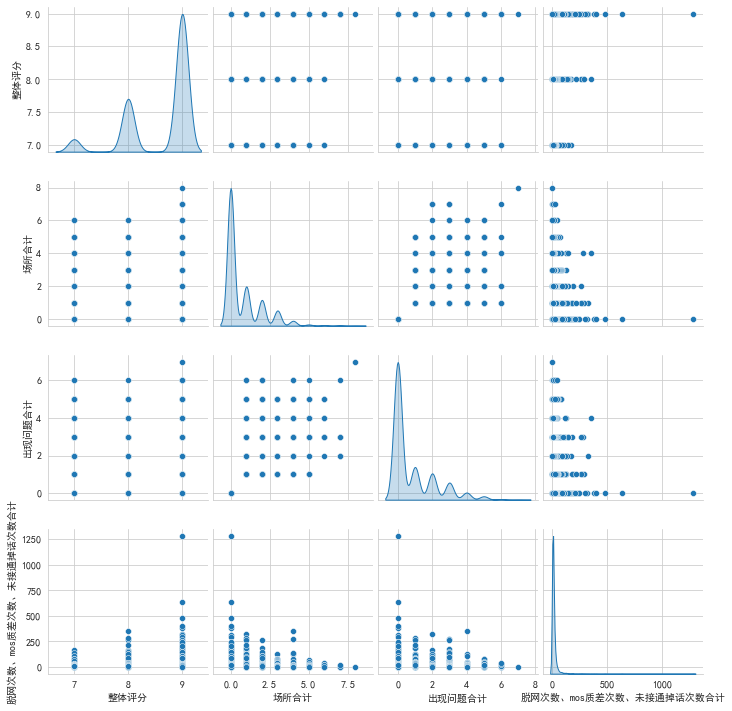

In [31]:
sns.pairplot(dataOneHigh[['整体评分','场所合计','出现问题合计','脱网次数、mos质差次数、未接通掉话次数合计']],kind='scatter',diag_kind='kde')
plt.savefig('figuresOne\\[附件1]高分组[场所合计、出现问题合计、脱网次数、mos质差次数、未接通掉话次数合计]评分多变量联合分布图.pdf',bbox_inches='tight')

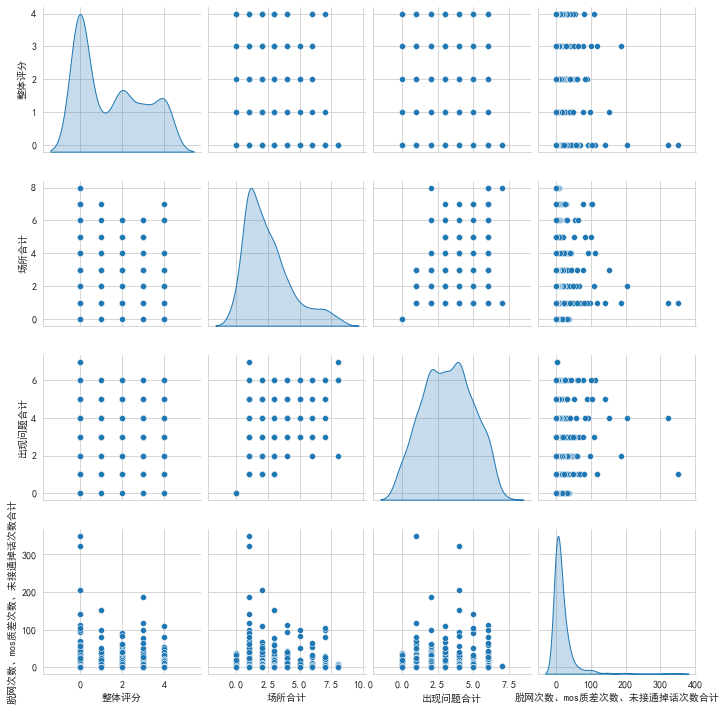

In [32]:
sns.pairplot(dataOneLow[['整体评分','场所合计','出现问题合计','脱网次数、mos质差次数、未接通掉话次数合计']],kind='scatter',diag_kind='kde')
plt.savefig('figuresOne\\[附件1]低分组[场所合计、出现问题合计、脱网次数、mos质差次数、未接通掉话次数合计]评分多变量联合分布图.pdf',bbox_inches='tight')

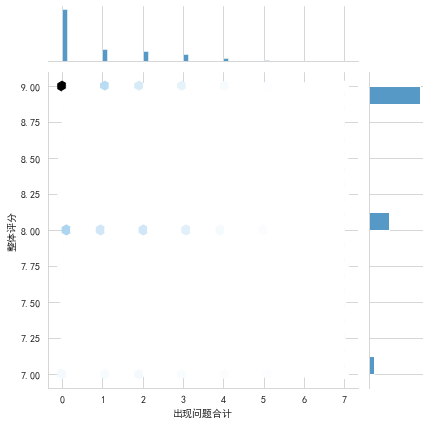

In [33]:
sns.jointplot(x='出现问题合计', y='整体评分', data=dataOneHigh, kind='hex')
plt.savefig('figuresOne\\[附件1]高分组出现问题合计分布情况.pdf',bbox_inches='tight')

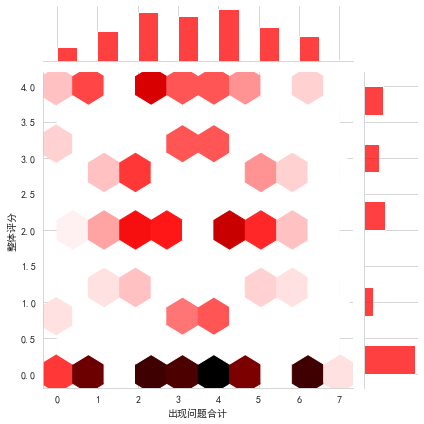

In [34]:
sns.jointplot(x='出现问题合计', y='整体评分', data=dataOneLow, kind='hex',color='r')
plt.savefig('figuresOne\\[附件1]低分组出现问题合计分布情况.pdf',bbox_inches='tight')

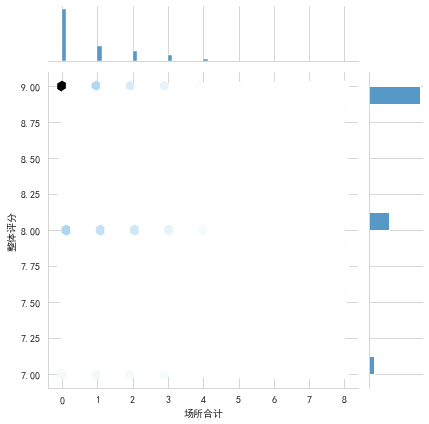

In [35]:
sns.jointplot(x='场所合计',y='整体评分',data=dataOneHigh,kind='hex')
plt.savefig('figuresOne\\[附件1]高分组场所合计分布情况.pdf',bbox_inches='tight')

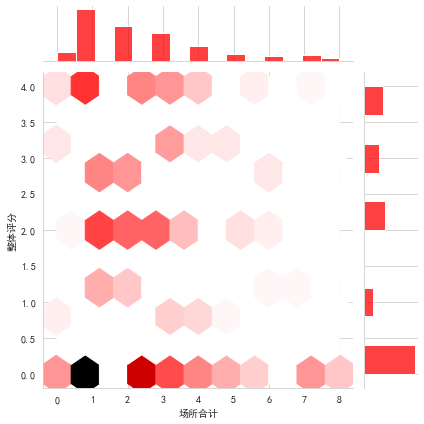

In [36]:
sns.jointplot(x='场所合计',y='整体评分',data=dataOneLow,kind='hex',color='r')
plt.savefig('figuresOne\\[附件1]低分组场所合计分布情况.pdf',bbox_inches='tight')

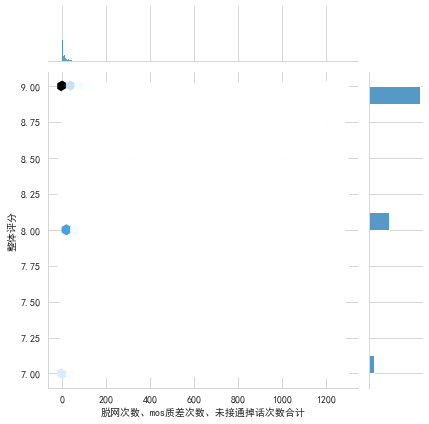

In [37]:
sns.jointplot(x='脱网次数、mos质差次数、未接通掉话次数合计',y='整体评分',data=dataOneHigh,kind='hex')
plt.savefig('figuresOne\\[附件1]高分组脱网次数、mos质差次数、未接通掉话次数合计分布情况.pdf',bbox_inches='tight')

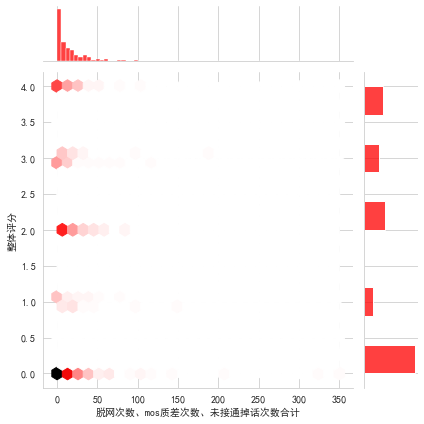

In [38]:
sns.jointplot(x='脱网次数、mos质差次数、未接通掉话次数合计',y='整体评分',data=dataOneLow,kind='hex',color='r')
plt.savefig('figuresOne\\[附件1]低分组脱网次数、mos质差次数、未接通掉话次数合计分布情况.pdf',bbox_inches='tight')

In [39]:
dataOneHigh['终端品牌'].mode()

0    11
Name: 终端品牌, dtype: int32

In [40]:
dataOneLow['终端品牌'].mode()

0    22
Name: 终端品牌, dtype: int32

## 异常用户评分数据剔除

In [41]:
dataOneSample=dataOne[((dataOne['其他，请注明']==1)|(dataOne['其他，请注明.1']==1))|((abs(dataOne['语音通话整体满意度']-dataOne['网络覆盖与信号强度'])<=5)&(abs(dataOne['语音通话整体满意度']-dataOne['语音通话清晰度'])<=4)&(abs(dataOne['语音通话整体满意度']-dataOne['语音通话稳定性'])<=4)&(dataOne['网络覆盖与信号强度']-dataOne['语音通话清晰度']<=4)&(dataOne['网络覆盖与信号强度']-dataOne['语音通话稳定性']<=4)&(dataOne['语音通话清晰度']-dataOne['语音通话稳定性']<=3))]
dataOneSample

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识,场所合计,出现问题合计,脱网次数、mos质差次数、未接通掉话次数合计,整体评分
0,9,5,5,5,1,0,1,0,0,0,...,480,1.0,8450801,8450801,1,5,1,2,0,6
1,1,0,0,0,1,1,1,0,1,0,...,480,1.0,17425910,17425910,1,5,3,2,0,0
2,9,6,6,6,1,0,0,0,0,0,...,413,1.0,6215849,6215849,0,4,1,2,0,7
3,5,6,6,5,1,1,1,0,0,0,...,301,1.0,5370710,5370710,1,4,2,2,0,6
4,4,4,3,2,1,0,1,0,0,1,...,1193,1.0,3857521,3857521,0,5,3,4,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5423,9,9,9,7,1,0,1,0,0,0,...,320,0.0,16654303,0,0,3,1,2,5,8
5424,9,9,9,9,1,1,1,0,0,0,...,147,0.0,627901,0,1,4,3,2,15,9
5425,5,4,6,3,1,0,0,0,1,0,...,150,0.0,6816663,0,0,5,2,2,0,4
5426,8,8,9,8,1,0,0,0,0,1,...,82,0.0,1841891,0,0,4,2,2,8,8


In [42]:
dataOne

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识,场所合计,出现问题合计,脱网次数、mos质差次数、未接通掉话次数合计,整体评分
0,9,5,5,5,1,0,1,0,0,0,...,480,1.0,8450801,8450801,1,5,1,2,0,6
1,1,0,0,0,1,1,1,0,1,0,...,480,1.0,17425910,17425910,1,5,3,2,0,0
2,9,6,6,6,1,0,0,0,0,0,...,413,1.0,6215849,6215849,0,4,1,2,0,7
3,5,6,6,5,1,1,1,0,0,0,...,301,1.0,5370710,5370710,1,4,2,2,0,6
4,4,4,3,2,1,0,1,0,0,1,...,1193,1.0,3857521,3857521,0,5,3,4,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5423,9,9,9,7,1,0,1,0,0,0,...,320,0.0,16654303,0,0,3,1,2,5,8
5424,9,9,9,9,1,1,1,0,0,0,...,147,0.0,627901,0,1,4,3,2,15,9
5425,5,4,6,3,1,0,0,0,1,0,...,150,0.0,6816663,0,0,5,2,2,0,4
5426,8,8,9,8,1,0,0,0,0,1,...,82,0.0,1841891,0,0,4,2,2,8,8


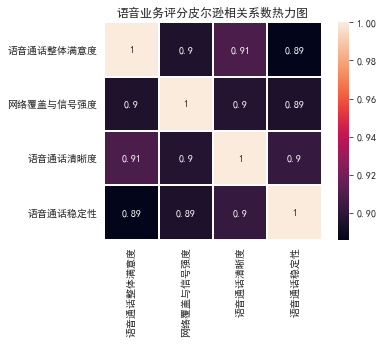

In [43]:
sns.heatmap(dataOne[['语音通话整体满意度','网络覆盖与信号强度','语音通话清晰度','语音通话稳定性']].corr(method='pearson'),linewidths=0.1,vmax=1.0, square=True,linecolor='white', annot=True)
plt.title('语音业务评分皮尔逊相关系数热力图')
plt.savefig('figuresOne\\[附件1]语音业务评分皮尔逊相关系数热力图.pdf',bbox_inches='tight')